In [1]:
%load_ext autoreload
# to make modification in .py file type %autoreload

%load_ext line_profiler
#for finding out how long code takes to run
#an example of how to get diagnostics on functions
#%lprun -f ff.generate_map_full ff.generate_map_full(384, A_BB, alpha_BB, beta_sigma, freqs, nu0)

In [2]:
#trying to consolidate the work so far into a cohesive document and notation. Pushing definitions into 
#separate .py file

#------packages-------------------
%pylab inline
import time
import healpy as hp
import matplotlib.pyplot as plt
import foreground_functions as ff
from scipy.optimize import curve_fit, minimize
# import scipy.special as sp #for the zeta function sp.zeta() in the 0x2 term
# from scipy.stats import kstest, norm




Populating the interactive namespace from numpy and matplotlib


In [7]:
%autoreload

In [16]:
nside = 128
amp = 1.7e3
alpha = -3.0
beta = -3.2
gamma = -2.5
ells = np.arange(3*nside)
freqs = np.linspace(30, 300, 5)*1.e9

In [9]:
start=time.time()
data = ff.PS_data(freqs, amp, alpha, beta, gamma)
print(time.time()-start)

0.903285026550293


In [10]:
start=time.time()
model = ff.model(freqs, amp, alpha, beta, gamma)
print(time.time()-start)

1.5038988590240479


In [11]:
def residuals(params, freqs, data):
    amp, alpha, beta, gamma = params
    model = ff.model(freqs, amp, alpha, beta, gamma)
    return np.sum((data - model)**2)

In [13]:
power_spectrum_data = ff.PS_data(freqs, amp, alpha, beta, gamma)

In [127]:
start=time.time()
result = minimize(residuals, [1e3, -1, -1, -3], args=(freqs, power_spectrum_data), bounds=((None, None), (None, None), (None, None), (None, -2.01)))
print(time.time()-start)

207.48961782455444


In [129]:
result

      fun: 1.5267280881389482e+22
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.25766848e+22, -2.94237166e+23,  3.61428450e+22, -6.82660067e+23])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 130
      nit: 3
   status: 0
  success: True
        x: array([1000.00000159,   -1.00000033,   -1.00000141,   -3.00000065])

In [ ]:
#not really moving from initialising position....

In [29]:
%autoreload

In [33]:
model_single = ff.model_single(ells, amp, alpha, beta, gamma)

In [24]:
model_single.shape

(384,)

In [34]:
data_single = ff.PS_data(30e9, amp, alpha, beta, gamma)

In [77]:
start=time.time()
opt_params, covariance = curve_fit(ff.model_single, ells, data_single, p0=[1e3, -1, -1, -3], bounds=(-np.inf,[np.inf,np.inf,np.inf,-2.001]))
print(time.time()-start)

41.09994316101074


In [78]:
opt_params

array([1000.00002695,   -1.03346684,   -1.05901874,   -3.00724813])

In [ ]:
#not really moving from initialising position....

In [45]:
covariance

array([[ 3.86010008e+18, -1.32255306e+14,  4.25954468e+14,
         9.16390121e+15],
       [-1.32255306e+14,  7.16636023e+09, -1.49650306e+10,
        -3.18164467e+11],
       [ 4.25954468e+14, -1.49650306e+10,  4.70554517e+10,
         1.01180826e+12],
       [ 9.16390121e+15, -3.18164467e+11,  1.01180826e+12,
         2.17618188e+13]])

In [46]:
np.sqrt(np.diag(covariance))

array([1.96471374e+09, 8.46543574e+04, 2.16922686e+05, 4.66495646e+06])

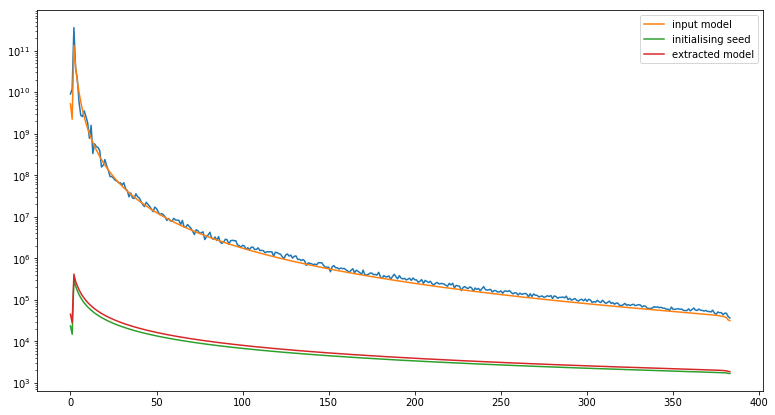

In [79]:
figure(figsize(13,7))
semilogy(data_single)
semilogy(model_single, label='input model')
semilogy(ff.model_single(ells, 1e3, -1, -1, -3), label='initialising seed')
semilogy(ff.model_single(ells, opt_params[0], opt_params[1], opt_params[2], opt_params[3]), label='extracted model')
legend()

In [ ]:
#not great...

In [86]:
full_model = ff.full_model(ells, freqs, amp, alpha, beta, gamma)

In [85]:
%autoreload

In [87]:
full_model.shape

(5, 384)

In [118]:
#try residual stuff with this new 'full_model' function
def residuals_full(params, ells, freqs, data):
    chi2 = 0
    amp, alpha, beta, gamma = params
    model = ff.full_model(ells, freqs, amp, alpha, beta, gamma)
#     resid = data - model
#     for ell in range(2, len(resid)):
#         cosmic_var = 2/(2*ell+1) * model[ell]**2
#         chi2 += resid[ell]**2/cosmic_var
    return np.sum((data[:,2:] - model[:,2:])**2)

In [119]:
parameters = [amp, alpha, beta, gamma]

In [117]:
power_spectrum_data[:,2:].shape

(5, 382)

In [121]:
x = residuals_full(parameters, ells, freqs, power_spectrum_data)
print(x)

3.9627930182423577e+20


In [114]:
big_x = np.zeros(100)
for i in range(100):
    big_x[i] = residuals_full(parameters, ells, freqs, power_spectrum_data)

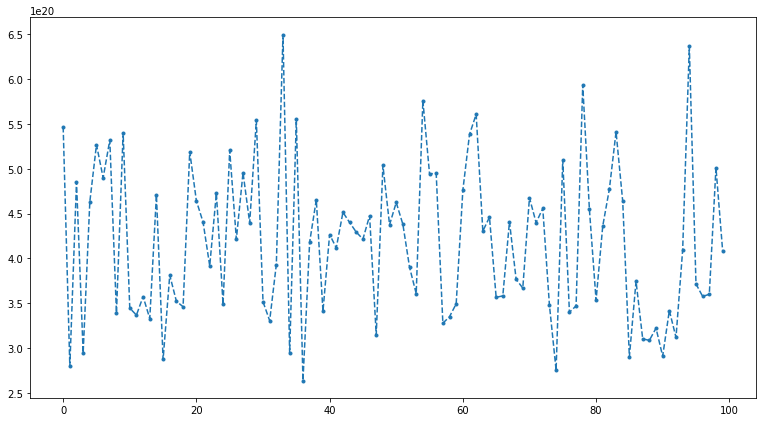

In [124]:
plot(big_x, '--.')

In [ ]:
#within factor of 2, this should be okay...